<a href="https://colab.research.google.com/github/ahmadcah/project_pembelajaran_mesin_2018-198/blob/main/GoogleColab/versi_3_Kegiatan_Modul_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Soal Praktikum Overfitting Handling #1**

## Kegiatan 1 **(Individu)** 
70 poin

**Peraturan :**
* Tidak boleh ada error dalam kode program
* Dalam modul ini tidak diperbolehkan menggunakan teknik transfer learning dari pretrain model baik yang telah dibangun sendiri atau anda dapatkan dari sumber lain (tensorflow, keras, dan sebagainya)
* Perhatikan langkah demi langkah yang diperintahkan dalam kegiatan ini

### Pengenalan tugas kegiatan 1

Dataset yang akan anda gunakan dalam kegiatan ini adalah dataset [Rock Paper Scissors](https://www.kaggle.com/drgfreeman/rockpaperscissors).  Demi mempermudah anda dalam mengerjakan modul ini maka akan sangat disarankan untuk menggunakan [google colab](https://colab.research.google.com/). Anda dapat menggunakan google colab untuk mendownload langsung dataset dari kaggle dan menyimpannya dalam google drive anda. Untuk kenyamanan dan ruang kerja yang besar akan lebih baik anda menggunakan email kampus untuk menyimpan dataset yang anda gunakan. Perhatikan langkah berikut untuk melakukan setting environment anda.

### 1. Initial process



* Mount drive terlebih dahulu

* Untuk dapat mengakses dataset ini anda diharuskan memiliki akun kaggle. Jika belum memilikinya buat satu akun pribadi.

* Download kaggle API.json kemudian upload dalam google drive anda.

* Ubah lokasi direktori kerja anda ke direktori dimana anda menyimpan kaggle.json

* Buka laman dataset kemudian Copy API Command.

* Jalankan perintah untuk mendownload dataset dari kaggle menggunakan google colab.

* Gunakan tutorial berikut untuk lebih jelasnya : [Fetch Kaggle Dataset into Google Colab](https://medium.com/analytics-vidhya/how-to-fetch-kaggle-datasets-into-google-colab-ea682569851a)

* Untuk selanjutnya pahami code dibawah dengan baik.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Definisikan path kaggle json
# Sesuaikan dengan path anda
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/drive/MyDrive/Kaggle"

In [ ]:
# Ubah lokasi direktori kerja
# Sesuaikan dengan path anda
%cd /content/drive/MyDrive/Kaggle

/content/drive/MyDrive/Kaggle


In [ ]:
# Cek apakah api sudah terbaca oleh sistem
!ls  

kaggle.json


* Paste API Command dari kaggle dataset yang telah anda copy sebelumnya dan tambahkan tanda seru didepannya.
* Pastikan anda menggunakan akun google dari kampus untuk mendapatkan storage penyimpanan unlimited.
* Lebih disarankan untuk menggunakan google colab karena proses download data lebih cepat dan stabil daripada download manual dan menggunakan jupyter notebook.

In [ ]:
!kaggle datasets download -d drgfreeman/rockpaperscissors

 96% 295M/306M [00:02<00:00, 115MB/s]
100% 306M/306M [00:02<00:00, 114MB/s]


In [ ]:
# Cek isi direktori kerja dan memastikan dataset telah berhasil didownload.
!ls

kaggle.json  rockpaperscissors.zip


In [2]:
import zipfile

local_zip = '/content/drive/MyDrive/Kaggle/rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/content')
zip_ref.close()

Buat folder baru bernama `dataset` dan memindahkan folder `paper, rock, scissors` kedalam folder `dataset`. Selanjutnya, lakukan splitting dataset menjadi 3 bagian `train, test, val` dan simpan ketiga folder tersebut diluar folder `dataset`. Data `train dan val` akan digunakan ketika anda melakukan training model. Dan data `test` akan anda gunakan ketika anda melakukan prediksi unseen data menggunakan model yang telah anda latih.

*Ingat google colab juga menerima command berbasis linux.*

In [3]:
from shutil import copyfile
import random
import os

def split_data(SOURCE, TRAINING, VALIDATION, TESTING, VAL_SIZE, TEST_SIZE):
    l = len(os.listdir(SOURCE))
    print("total: ",l)
    VAL_limit = int(l * VAL_SIZE)
    print("val: ",VAL_limit)
    TEST_limit = int(l * TEST_SIZE)
    print("test: ",TEST_limit)
    TRAIN_limit = l-(VAL_limit+TEST_limit)
    print("train: ",TRAIN_limit)
    print("total akhir: "+str(VAL_limit+TEST_limit+TRAIN_limit))
    for i, f in enumerate(random.sample(os.listdir(SOURCE), l)):
        if os.path.getsize(SOURCE + "/" + f) > 0:
            if i < TEST_limit:
                copyfile(SOURCE + "/" + f, TESTING + "/" + f)
            elif i >= TEST_limit and i < VAL_limit+TEST_limit:
                copyfile(SOURCE + "/" + f, VALIDATION + "/" + f)
            else:
              copyfile(SOURCE + "/" + f, TRAINING + "/" + f)
        else:
            print(f + " is zero length, so ignoring")

In [4]:
os.mkdir("/content/rps")
os.mkdir("/content/rps/train")
os.mkdir("/content/rps/valid")
os.mkdir("/content/rps/testing")
os.mkdir("/content/rps/train/rock")
os.mkdir("/content/rps/train/paper")
os.mkdir("/content/rps/train/sciss")
os.mkdir("/content/rps/valid/rock")
os.mkdir("/content/rps/valid/paper")
os.mkdir("/content/rps/valid/sciss")
os.mkdir("/content/rps/testing/rock")
os.mkdir("/content/rps/testing/paper")
os.mkdir("/content/rps/testing/sciss")

In [5]:
ps = "/content/rps-cv-images/paper"
rs = "/content/rps-cv-images/rock"
ss = "/content/rps-cv-images/scissors"
trpd = "/content/rps/train/paper"
vapd = "/content/rps/valid/paper"
tspd = "/content/rps/testing/paper"
trrd = "/content/rps/train/rock"
vard = "/content/rps/valid/rock"
tsrd = "/content/rps/testing/rock"
trsd = "/content/rps/train/sciss"
vasd = "/content/rps/valid/sciss"
tssd = "/content/rps/testing/sciss"


In [6]:
split_data(ps, trpd, vapd, tspd, 0.24, 0.01)
split_data(rs, trrd, vard, tsrd, 0.24, 0.01)
split_data(ss, trsd, vasd, tssd, 0.24, 0.01)

total:  712
val:  170
test:  7
train:  535
total akhir: 712
total:  726
val:  174
test:  7
train:  545
total akhir: 726
total:  750
val:  180
test:  7
train:  563
total akhir: 750


In [7]:
print(len(os.listdir(trpd)))
print(len(os.listdir(vapd)))
print(len(os.listdir(tspd)))
print(len(os.listdir(trrd)))
print(len(os.listdir(vard)))
print(len(os.listdir(tsrd)))
print(len(os.listdir(trsd)))
print(len(os.listdir(vasd)))
print(len(os.listdir(tssd)))

535
170
7
545
174
7
563
180
7


In [ ]:
!rm -rf /content/rps

### 2. Data Preprocessing

Kita anggap dataset yang kita miliki merupakan dataset yang telah bersih dan siap digunakan untuk proses training model. Namun agar data yang kita miliki dapat diproses oleh model maka kita perlu melakukan sedikit proses augmentasi sederhana. 

**NOTE :** Penjelasan augmentasi secara detail akan dibahas pada modul selanjutnya. Disini kita akan mengunakan augmentasi sederhana saja seperti resize, flip dan rotation.

Lakukan proses agumentasi sederhana pada dataset anda menggunakan `ImageDataGenerator` dengan ketentuan melakukan proses seperti berikut :

* Resize
* Rescaling
* Color Mode
* Shuffle
* Class Mode

Terapkan semua proses diatas pada data `train, test dan validation`.

In [8]:
# TULIS KODE ANDA DISINI
import tensorflow as tf
bs = 32
TRAINING_DIR = "/content/rps/train"
training_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale = 1./255)
train_generator = training_datagen.flow_from_directory(
	TRAINING_DIR,
	target_size=(150,150),
	class_mode='categorical',
  color_mode='rgb',
  shuffle=True,
  batch_size=bs)

VALIDATION_DIR = "/content/rps/valid"
validation_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale = 1./255)
validation_generator = validation_datagen.flow_from_directory(
	VALIDATION_DIR,
	target_size=(150,150),
	class_mode='categorical',
  color_mode='rgb',
  shuffle=True,
  batch_size=bs)

TESTING_DIR = "/content/rps/testing"
testing_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale = 1./255)
testing_generator = validation_datagen.flow_from_directory(
	TESTING_DIR,
	target_size=(150,150),
	class_mode='categorical',
  color_mode='rgb',
  shuffle=True,
  batch_size=bs)

Found 1643 images belonging to 3 classes.
Found 524 images belonging to 3 classes.
Found 21 images belonging to 3 classes.


### 3. Definisikan Model CNN

Bangun model CNN dan lakukan evaluasi sesuai kriteria **WAJIB** berikut:

* Menerapkan proses Convolution 
* Menerapkan proses Pooling
* Menerapkan Dropout
* Menerpakan BatchNormalization
* Evaluasi model menggunakan grafik loss dan accuracy
* Evaluasi menggunakan classification report
* Evaluasi menggunakan confusion matrix
* Pastikan nilai akurasi model > 80%
* Mendefinisikan minimal 100 epoch untuk masing-masing model
* Melakukan prediksi minimal 15 gambar acak yang dapat mewakili seluruh kelas
* Menampilkan input gambar yang di prediksi beserta label hasil prediksi, nilai akurasi prediksi, dan lama waktu prediksi dalam sebuah plot. (15 gambar ditampilkan dalam 1 plot)
* Save model dalam file `json` dan simpan bobot dalam file `HDF5`
* Pastikan model anda dapat memprediksi unseen data dengan benar.

In [9]:
# TULIS KODE ANDA DISINI

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.GlobalMaxPooling2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 16)      448       
_________________________________________________________________
batch_normalization (BatchNo (None, 148, 148, 16)      64        
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 32)        4640      
_________________________________________________________________
batch_normalization_1 (Batch (None, 72, 72, 32)        128       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 64)        1

In [10]:
model.compile(loss = 'categorical_crossentropy', optimizer='rmsprop', metrics=['acc'])

In [11]:
spe = len(train_generator.classes)//bs
print(spe)
vs = len(validation_generator.classes)//bs
print(vs)

51
16


In [12]:
history = model.fit(train_generator, 
                    epochs=100, 
                    steps_per_epoch=spe, 
                    validation_data = validation_generator, 
                    verbose = 1, 
                    validation_steps=vs)

Epoch 1/100
51/51 [==============================] - 38s 137ms/step - loss: 0.8230 - acc: 0.7381 - val_loss: 1.0809 - val_acc: 0.4648
Epoch 2/100
51/51 [==============================] - 8s 149ms/step - loss: 0.2706 - acc: 0.9119 - val_loss: 1.0497 - val_acc: 0.3359
Epoch 3/100
51/51 [==============================] - 6s 125ms/step - loss: 0.1616 - acc: 0.9491 - val_loss: 1.0208 - val_acc: 0.3281
Epoch 4/100
51/51 [==============================] - 6s 126ms/step - loss: 0.1239 - acc: 0.9609 - val_loss: 0.7766 - val_acc: 0.5898
Epoch 5/100
51/51 [==============================] - 6s 126ms/step - loss: 0.1332 - acc: 0.9534 - val_loss: 0.8948 - val_acc: 0.5410
Epoch 6/100
51/51 [==============================] - 8s 151ms/step - loss: 0.1330 - acc: 0.9615 - val_loss: 0.7231 - val_acc: 0.6680
Epoch 7/100
51/51 [==============================] - 6s 127ms/step - loss: 0.1009 - acc: 0.9702 - val_loss: 0.7117 - val_acc: 0.6758
Epoch 8/100
51/51 [==============================] - 6s 127ms/step -

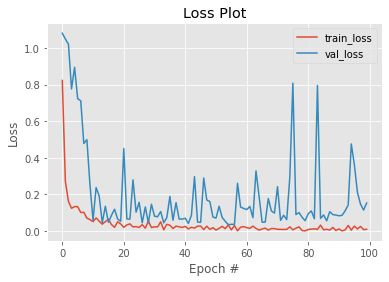

In [13]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np

plt.style.use("ggplot")
plt.figure()
#plt.axis(0,15,0,8)
plt.plot(np.arange(0, 100), history.history["loss"], label="train_loss")
plt.plot(np.arange(0, 100), history.history["val_loss"], label="val_loss")
plt.title("Loss Plot")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.legend()
plt.show()

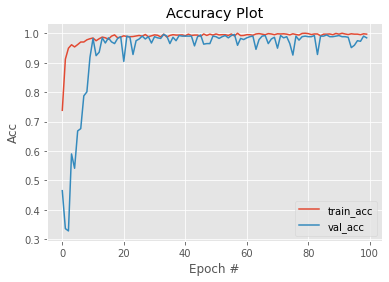

In [14]:
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 100), history.history["acc"], label="train_acc")
plt.plot(np.arange(0, 100), history.history["val_acc"], label="val_acc")
plt.title("Accuracy Plot")
plt.xlabel("Epoch #")
plt.ylabel("Acc")
plt.legend()
plt.show()

In [ ]:
%cd /content/rps/testing

/content/rps/testing


In [ ]:
!ls

paper  rock  sciss


In [19]:
label = list(train_generator.class_indices.keys())
label

['paper', 'rock', 'sciss']

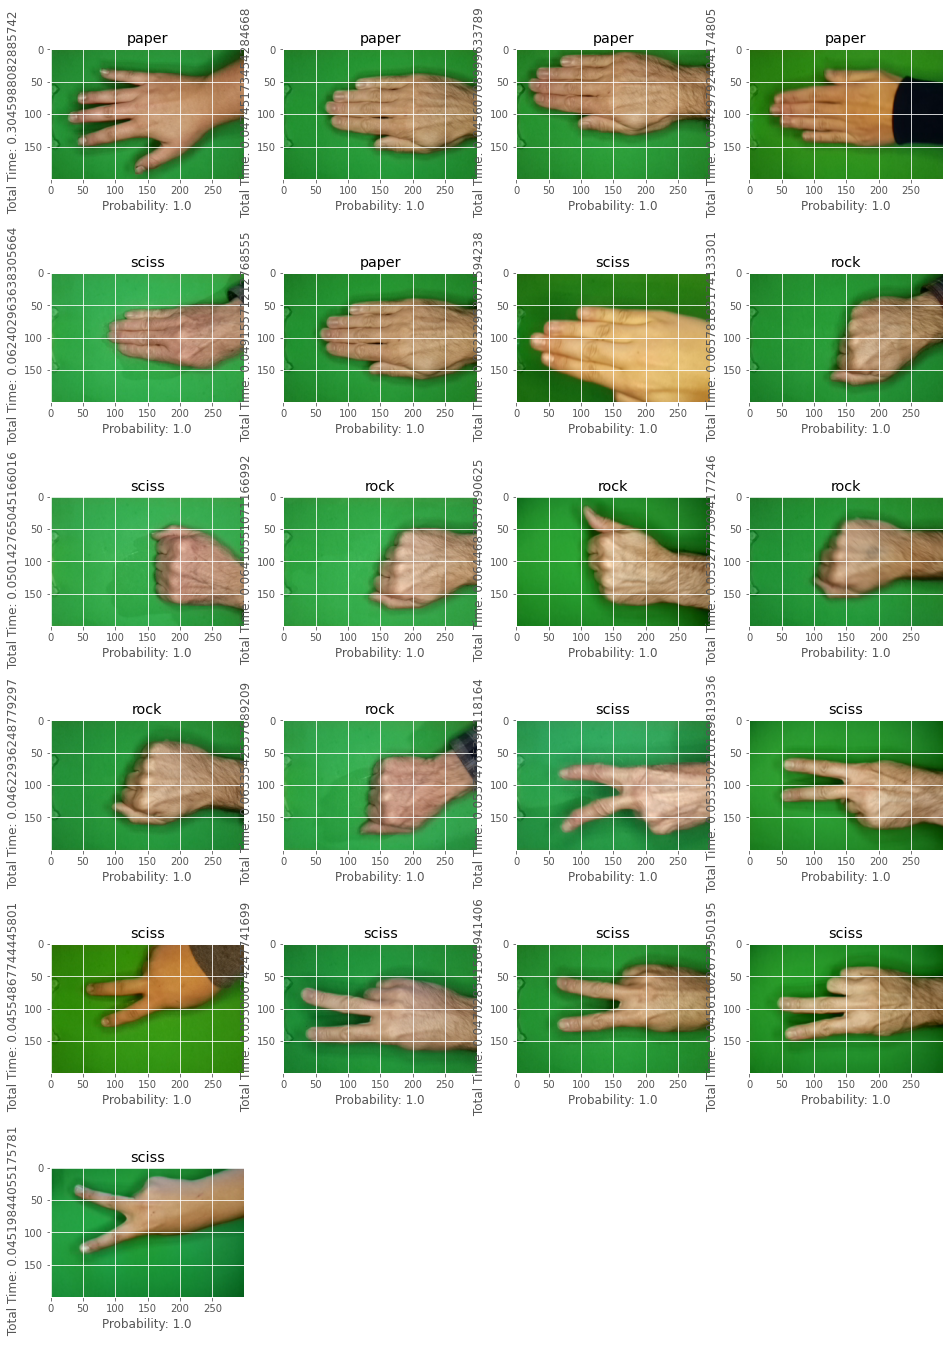

In [21]:
from keras.preprocessing import image
import time
import matplotlib.image as mpimg
start_time = time.time()
fig = plt.gcf()
fig.set_size_inches(4 * 4, 6 * 4)
for i,f in enumerate(testing_generator.filepaths):
  img = image.load_img(f, target_size=(150, 150))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  images = np.vstack([x])
  bp = time.time()
  classes = model.predict(images)
  totaltime = time.time()-bp
  sp = plt.subplot(6, 4, i + 1)
  img = mpimg.imread(f)
  plt.ylabel(" Total Time: "+str(totaltime))
  probab = "Probability: "+str(np.max(classes))
  plt.xlabel(probab)
  plt.title(label[np.argmax(classes)])
  plt.imshow(img)

plt.show()

In [26]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
num_of_test_samples = len(validation_generator.filenames)

Y_pred = model.predict(validation_generator)
y_pred = np.argmax(Y_pred, axis=1)

print('\nConfusion Matrix\n')
print(confusion_matrix(validation_generator.classes, y_pred))
print('\n\nClassification Report\n')
print(classification_report(validation_generator.classes, y_pred, target_names=label))


Confusion Matrix

[[55 52 63]
 [56 62 56]
 [62 56 62]]


Classification Report

              precision    recall  f1-score   support

       paper       0.32      0.32      0.32       170
        rock       0.36      0.36      0.36       174
       sciss       0.34      0.34      0.34       180

    accuracy                           0.34       524
   macro avg       0.34      0.34      0.34       524
weighted avg       0.34      0.34      0.34       524



In [27]:
# serialize model to JSON
model_json = model.to_json()
with open("/content/drive/MyDrive/Model/modelP3.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("/content/drive/MyDrive/Model/modelP3.h5")
print("Saved model to disk")

Saved model to disk


## Kegiatan 2 **(berkelompok)**
30 poin

**Ketentuan Wajib**
* Tulis dokumentasi tugas kelompok anda dalam file README.md
* Cek daftar dataset seluruh praktikan [disini](https://docs.google.com/spreadsheets/d/1qyu5AVDhPhegpRTbNaDoq5qXX4_CX09Q7tYyD-fkF_c/edit?usp=sharing)
* Seluruh data dan progress pengerjaan tugas kelompok harus berada dalam github repository sebelum praktikum dimulai
* Tidak diperbolehkan berganti anggota kelompok selama satu semester ini
* Tidak diperbolehkan berganti repository selama mengerjakan tugas kelompok ini
* **Tidak diperbolehkan berganti dataset atau jurnal rujukan**
* Pastikan anda menggunakan akun github pribadi untuk melakukan commit dan push

**Penilaian**
* Keaktifan dalam tim
* Kontribusi dalam proyek dan tim
* Penerapan prinsip kerja Agile (sprint backlog dan report terdokumentasikan dengan baik)
* Progress pengerjaan tugas kelompok
* Pemahaman masing-masing anggota tim terhadap tugas yang dikerjakan
* Pendokumentasian proyek "clear and clean documentation"

**Materi pendukung**
* [Project documentation](https://realpython.com/documenting-python-code)
* [Github readme](https://docs.github.com/en/github/writing-on-github/getting-started-with-writing-and-formatting-on-github/basic-writing-and-formatting-syntax)
* [Sprint backlog](https://www.lucidchart.com/blog/how-to-develop-a-product-backlog-in-agile)

**Tugas**

Melanjutkan tugas kelompok di modul 1 & 2 sekarang kerjakan beberapa poin berikut untuk didemokan kepada asisten masing-masing.

*   Melakukan proses preprocessing dataset dengan ketentuan:
 * augmentasi data menggunakan ImageDataGenerator
 * splitting dataset menjadi (75% train, 14% validation, 1% test)
*   Melakukan training beberapa skema model menggunakan model CNN sederhana buatan sendiri **(minimal 2 model)** *tidak diperbolehkan menggunakan transfer learning* 
 * Menerapkan proses Convolution
 * Menerapkan proses Pooling
 * Menerapkan Dropout
 * Menerpakan BatchNormalization
 * Model dengan beberapa variasi learning rate
 * Minimal 100 epoch per model
* Menyimpan model yang telah di training kedalam file `.h5` [Lihat disini](https://www.tensorflow.org/tutorials/keras/save_and_load)
*  Mencatat hasil perkembangan tugas kelompok dalam file `sprint_project.xlsx` tandai masing-masing task dengan status **Done** *untuk task yang telah selesai dikerjakan*, **On Going** *untuk task yang dalam proses pengerjaan*, **Waiting** *untuk task yang belum atau akan dikerjakan*
* Pastikan anda menulis tanggal mulai dan tanggal selesai masing-masing task dengan benar
* Pastikan anda menulis penanggung jawab masing-masing task (Penanggung jawab bertugas menyelesaikan dan menuntaskan masing-masing task yang diberikan)
* `commit` dan `push` seluruh perkerjaan yang anda lakukan kedalam branch pribadi dalam repository tugas kelompok yang telah anda buat sebelumnya.
* Presentasikan kepada asisten tentang apa yang anda lakukakan selama mengerjakan tugas kelompok ini. Ceritakan tentang tugas masing-masing anggota,  kendala dalam mengerjakan tugas sampai solusi yang anda lakukan saat mengerjakan tugas kelompok ini.

